In [39]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram


In [40]:
def initialize_s(qc, num_qubit, num_matching):
    """Apply a H-gate to 'qubits' in qc"""
    qc.x(num_qubit - 1)
    
    for q in range(num_matching):
        qc.h(q)
    #qc.reset(num_qubit)
    #qc.h(num_qubit)
        
    
    return qc

In [41]:
def compare_node1_node2(qc):
    #qc = QuantumCircuit(11)
    qc.barrier([0, 1, 2, 3, 4, 5, 6, 7])
    qc.cx(0, 2)
    qc.barrier(0)
    qc.cx(1, 3)
    qc.barrier([0, 1])
    qc.cx(2, 8)
    qc.barrier([0, 1, 2])
    qc.cx(3, 9)
    qc.barrier([0, 1, 2, 3, 4, 5, 6, 7])
    qc.x([8, 9])
    qc.ccx(8, 9, 10)
    qc.x([8, 9])
    qc.barrier([0, 1, 2])
    qc.cx(3, 9)
    qc.barrier([0, 1])
    qc.cx(2, 8)
    qc.barrier([0])
    qc.cx(1, 3)
    qc.cx(0, 2)
    #oracle_edge12 = qc.to_gate()
    #oracle_edge12.name = "edge12"
    #qc.draw()
    return qc

In [42]:
def compare_node1_node3(qc):
    #qc = QuantumCircuit(12)
    qc.barrier([0, 1, 2, 3, 4, 5, 6, 7])
    qc.cx(0, 4)
    qc.barrier([0])
    qc.cx(1, 5)
    qc.cx(4, 8)
    qc.barrier([0, 1, 2, 3, 4])
    qc.cx(5, 9)
    qc.barrier([0, 1, 2, 3, 4, 5, 6, 7])
    qc.x([8, 9])
    qc.ccx(8, 9, 11)
    qc.x([8, 9])
    qc.cx(5, 9)
    qc.barrier([0, 1, 2, 3, 4])
    qc.cx(4, 8)
    qc.barrier([0, 1, 2, 3])
    qc.cx(1, 5)
    qc.barrier([0])
    qc.cx(0, 4)
    #oracle_edge13 = qc.to_gate()
    #oracle_edge13.name = "edge13"
    #qc.draw()
    return qc

In [43]:
def compare_node1_node4(qc):
    #qc = QuantumCircuit(13)
    qc.barrier([0, 1, 2, 3, 4, 5, 6, 7])
    qc.cx(0, 6)
    qc.barrier([0])
    qc.cx(1, 7)
    qc.barrier([0, 1, 2, 3, 4, 5])
    qc.cx(6, 8)
    qc.barrier([0, 1, 2, 3, 4, 5, 6])
    qc.cx(7, 9)
    qc.barrier([0, 1, 2, 3, 4, 5, 6, 7])
    qc.x([8, 9])
    qc.ccx(8, 9, 12)
    qc.x([8, 9])
    qc.cx(7, 9)
    qc.barrier([0, 1, 2, 3, 4, 5, 6])
    qc.cx(6, 8)
    qc.barrier([0, 1, 2, 3, 4, 5])
    qc.cx(1, 7)
    qc.barrier([0])
    qc.cx(0, 6)
    #oracle_edge14 = qc.to_gate()
    #oracle_edge14.name = "edge14"
    #qc.draw()
    return qc

In [44]:
def compare_node2_node3(qc):
    #qc = QuantumCircuit(14)
    qc.barrier([0, 1, 2, 3, 4, 5, 6, 7])
    qc.cx(2, 4)
    qc.barrier([0, 1])
    qc.cx(3, 5)
    qc.barrier([0, 1, 2])
    qc.cx(4, 8)
    qc.barrier([0, 1, 2, 3])
    qc.cx(5, 9)
    qc.barrier([0, 1, 2, 3, 4])
    qc.x([8, 9])
    qc.ccx(8, 9, 13)
    qc.x([8, 9])
    qc.barrier([0, 1, 2, 3, 4, 5, 6, 7])
    qc.cx(5, 9)
    qc.barrier([0, 1, 2, 3, 4])
    qc.cx(4, 8)
    qc.barrier([0, 1, 2, 3])
    qc.cx(3, 5)
    qc.barrier([0, 1, 2])
    qc.cx(2, 4)
    qc.barrier([0, 1])
    #oracle_edge23 = qc.to_gate()
    #oracle_edge23.name = "edge23"
    #qc.draw()
    return qc

In [45]:
def compare_node2_node4(qc):
    #qc = QuantumCircuit(15)
    qc.barrier([0, 1, 2, 3, 4, 5, 6, 7])
    qc.cx(2, 6)
    qc.barrier([0, 1])
    qc.cx(3, 7)
    qc.barrier([0, 1, 2])
    qc.cx(6, 8)
    qc.barrier([0, 1, 2, 3, 4, 5])
    qc.cx(7, 9)
    qc.barrier([0, 1, 2, 3, 4, 5, 6])
    qc.x([8, 9])
    qc.ccx(8, 9, 14)
    qc.x([8, 9])
    qc.barrier([0, 1, 2, 3, 4, 5, 6, 7])
    qc.cx(7, 9)
    qc.barrier([0, 1, 2, 3, 4, 5, 6])
    qc.cx(6, 8)
    qc.barrier([0, 1, 2, 3, 4, 5])
    qc.cx(3, 7)
    qc.barrier([0, 1, 2])
    qc.cx(2, 6)
    qc.barrier([0, 1])
    #oracle_edge24 = qc.to_gate()
    #oracle_edge24.name = "edge24"
    #qc.draw()
    return qc

In [46]:
def compare_node3_node4(qc):
    #qc = QuantumCircuit(16)
    qc.barrier([0, 1, 2, 3, 4, 5, 6, 7])
    qc.cx(4, 6)
    qc.barrier([0, 1, 2, 3])
    qc.cx(5, 7)
    qc.barrier([0, 1, 2, 3, 4])
    qc.cx(6, 8)
    qc.barrier([0, 1, 2, 3, 4, 5])
    qc.cx(7, 9)
    qc.barrier([0, 1, 2, 3, 4, 5, 6])
    qc.x([8, 9])
    qc.ccx(8, 9, 15)
    qc.x([8, 9])
    qc.barrier([0, 1, 2, 3, 4, 5, 6, 7])
    qc.cx(7, 9)
    qc.barrier([0, 1, 2, 3, 4, 5, 6])
    qc.cx(6, 8)
    qc.barrier([0, 1, 2, 3, 4, 5])
    qc.cx(5, 7)
    qc.barrier([0, 1, 2, 3, 4])
    qc.cx(4, 6)
    qc.barrier([0, 1, 2, 3])
    #oracle_edge34 = qc.to_gate()
    #oracle_edge34.name = "edge34"
    #qc.draw()
    return qc

In [47]:
def diffuser(nqubits):
    
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "diffuser"
    return U_s

In [48]:
def diffuser_2(qc, nqubits):
    
    #qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    grover_circuit.barrier([0, 1, 2, 3, 4, 5, 6])
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    
    for qubit in range(nqubits):
        qc.h(qubit)
    
    # We will return the diffuser as a gate
    #U_s = qc.to_gate()
    #U_s.name = "diffuser"
    return qc

In [49]:
n_qubit = 17
n_matching = 8
grover_circuit = QuantumCircuit(n_qubit, 8)
grover_circuit.reset(range(0, 17))
grover_circuit = initialize_s(grover_circuit, n_qubit, n_matching)

for i in range(16):
    grover_circuit = compare_node1_node2(grover_circuit)
    grover_circuit = compare_node1_node3(grover_circuit)
    grover_circuit = compare_node1_node4(grover_circuit)
    grover_circuit = compare_node2_node3(grover_circuit)
    grover_circuit = compare_node2_node4(grover_circuit)
    grover_circuit = compare_node3_node4(grover_circuit)
    grover_circuit.barrier([10, 11, 12, 13, 14, 15])
    grover_circuit.barrier([9, 10, 11, 12, 13, 14, 15])
    grover_circuit.barrier([8, 9, 10, 11, 12, 13, 14, 15])
    grover_circuit.barrier([7, 8, 9, 10, 11, 12, 13, 14, 15])
    grover_circuit.barrier([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
    grover_circuit.h([16])
    grover_circuit.x([10, 11, 12, 13, 14, 15])
    grover_circuit.mcx([10, 11, 12, 13, 14, 15], 16)
    grover_circuit.x([10, 11, 12, 13, 14, 15])
    grover_circuit.h([16])
    grover_circuit.barrier([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
    grover_circuit.barrier([7, 8, 9, 10, 11, 12, 13, 14, 15])
    grover_circuit.barrier([8, 9, 10, 11, 12, 13, 14, 15])
    grover_circuit.barrier([9, 10, 11, 12, 13, 14, 15])
    grover_circuit.barrier([10, 11, 12, 13, 14, 15])
    grover_circuit = compare_node3_node4(grover_circuit)
    grover_circuit = compare_node2_node4(grover_circuit)
    grover_circuit = compare_node2_node3(grover_circuit)
    grover_circuit = compare_node1_node4(grover_circuit)
    grover_circuit = compare_node1_node3(grover_circuit)
    grover_circuit = compare_node1_node2(grover_circuit)
    grover_circuit.barrier([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
    grover_circuit = diffuser_2(grover_circuit, 8)
    
grover_circuit.measure([0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7])
#grover_circuit.draw(output = "mpl",  plot_barriers=False)

In [50]:
from qiskit import BasicAer, Aer,execute
sim = Aer.get_backend('aer_simulator')

In [51]:
job = execute(grover_circuit, backend = sim, shots = 1024)

In [52]:
counts = job.result().get_counts()

Locator attempting to generate 1230 ticks ([-11.4, ..., 234.39999999999912]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1230 ticks ([-11.4, ..., 234.39999999999912]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1230 ticks ([-11.4, ..., 234.39999999999912]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1230 ticks ([-11.4, ..., 234.39999999999912]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1230 ticks ([-11.4, ..., 234.39999999999912]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1230 ticks ([-11.4, ..., 234.39999999999912]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1230 ticks ([-11.4, ..., 234.39999999999912]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1230 ticks ([-11.4, ..., 234.39999999999912]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1230 ticks ([-11.4, ..., 234.3999

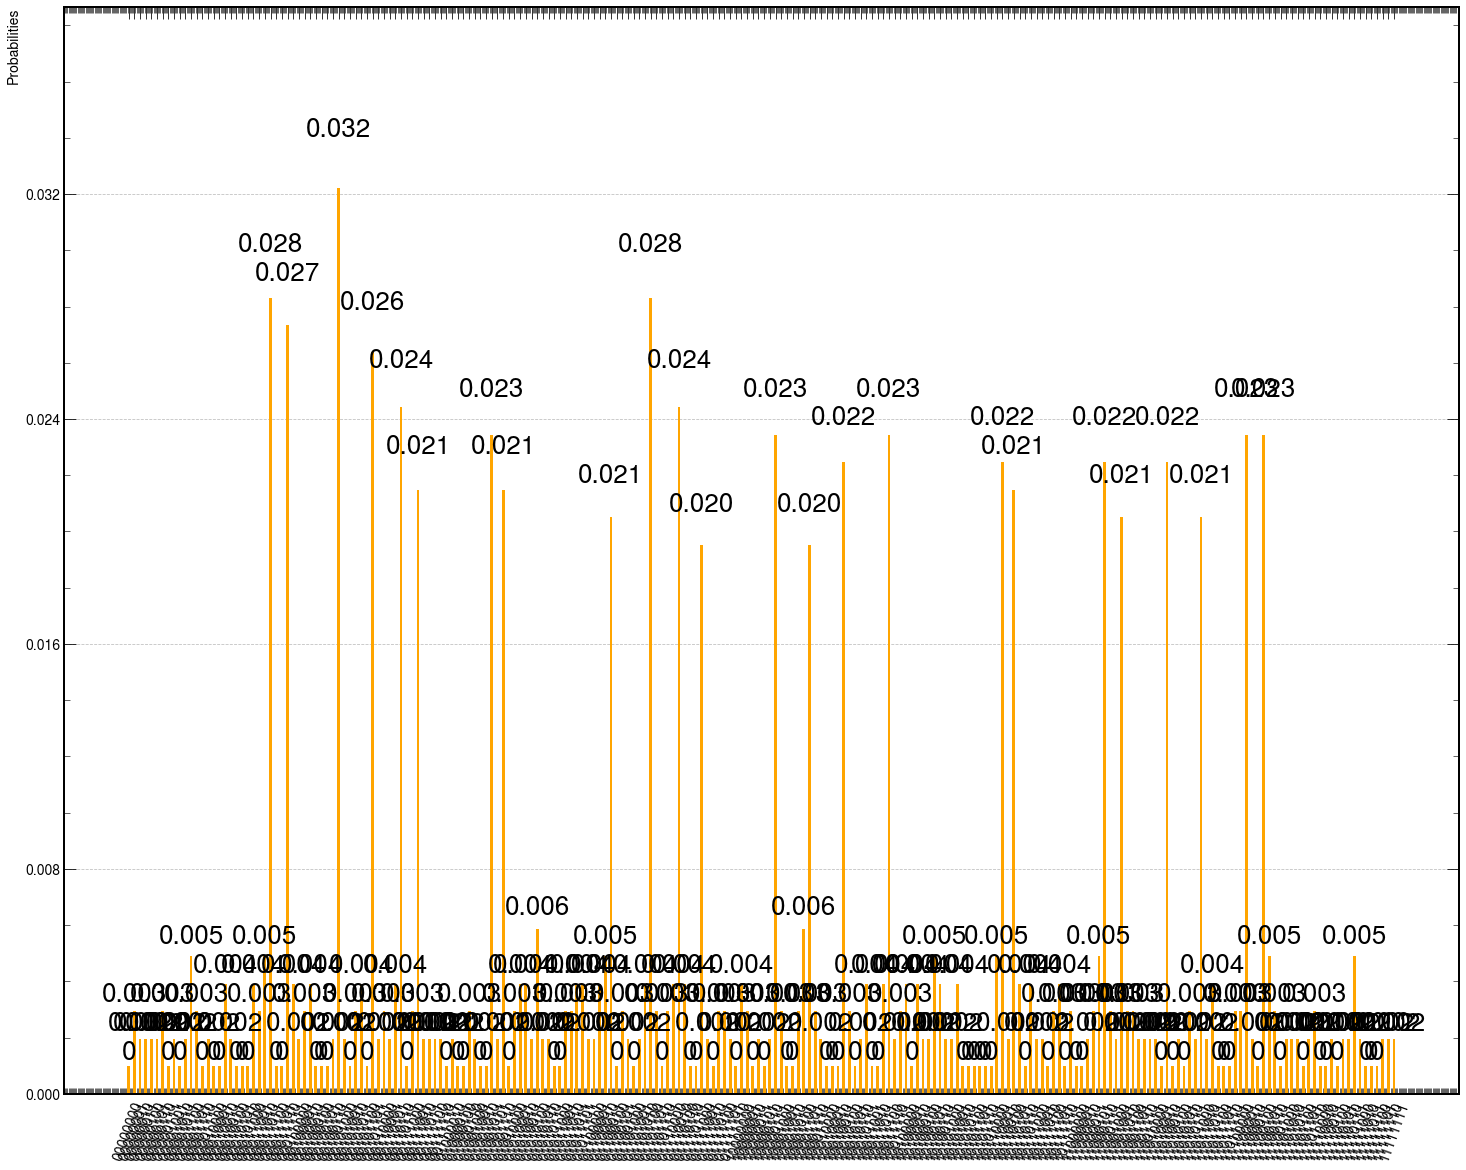

In [92]:
plot_histogram(counts, figsize = (25, 20), color = "orange")

In [59]:
IBMQ.save_account('e98108019189dbd357958aedc14339c82ad0b0e12ec45536f7b7604eb16e2ff549e5041663ac8cffac7a0e0a8843588f4b839d6bad9851ca44c04aa29b273ba0', overwrite=True)

In [60]:
provider = IBMQ.load_account()

In [61]:
provider = IBMQ.get_provider(hub='ibm-q-skku', group='korea-university', project='ku-students')



#backends = provider.backends()

In [62]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-skku', group='korea-university', project='ku-students')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-skku', group='korea-university', project='ku-students')>,
 <IBMQBackend('ibmq_montreal') from IBMQ(hub='ibm-q-skku', group='korea-university', project='ku-students')>,
 <IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-skku', group='korea-university', project='ku-students')>,
 <IBMQBackend('ibmq_kolkata') from IBMQ(hub='ibm-q-skku', group='korea-university', project='ku-students')>,
 <IBMQBackend('ibmq_mumbai') from IBMQ(hub='ibm-q-skku', group='korea-university', project='ku-students')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-skku', group='korea-university', project='ku-students')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-skku', group='korea-university', project='ku-students')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-skku', group='korea-university', project='ku-students')>,
 <IBMQBackend('ibm

In [63]:
device = provider.backends()[2]

In [64]:
device

<IBMQBackend('ibmq_montreal') from IBMQ(hub='ibm-q-skku', group='korea-university', project='ku-students')>

In [ ]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=1)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Job Status: job is queued (9)     

In [32]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

NameError: name 'job' is not defined

In [16]:
import mplhep
import numpy as np
import uproot
import math
from matplotlib import pyplot as plt
from tqdm import tqdm

In [25]:
plt.style.use(mplhep.style.LHCb2)  # CMS or ATLAS/LHCb

Locator attempting to generate 1252 ticks ([-11.600000000000001, ..., 238.5999999999991]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1252 ticks ([-11.600000000000001, ..., 238.5999999999991]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1252 ticks ([-11.600000000000001, ..., 238.5999999999991]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1252 ticks ([-11.600000000000001, ..., 238.5999999999991]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1252 ticks ([-11.600000000000001, ..., 238.5999999999991]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1252 ticks ([-11.600000000000001, ..., 238.5999999999991]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1252 ticks ([-11.600000000000001, ..., 238.5999999999991]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1252 ticks ([-11.600000000000001, ..., 238.5999999999991]),

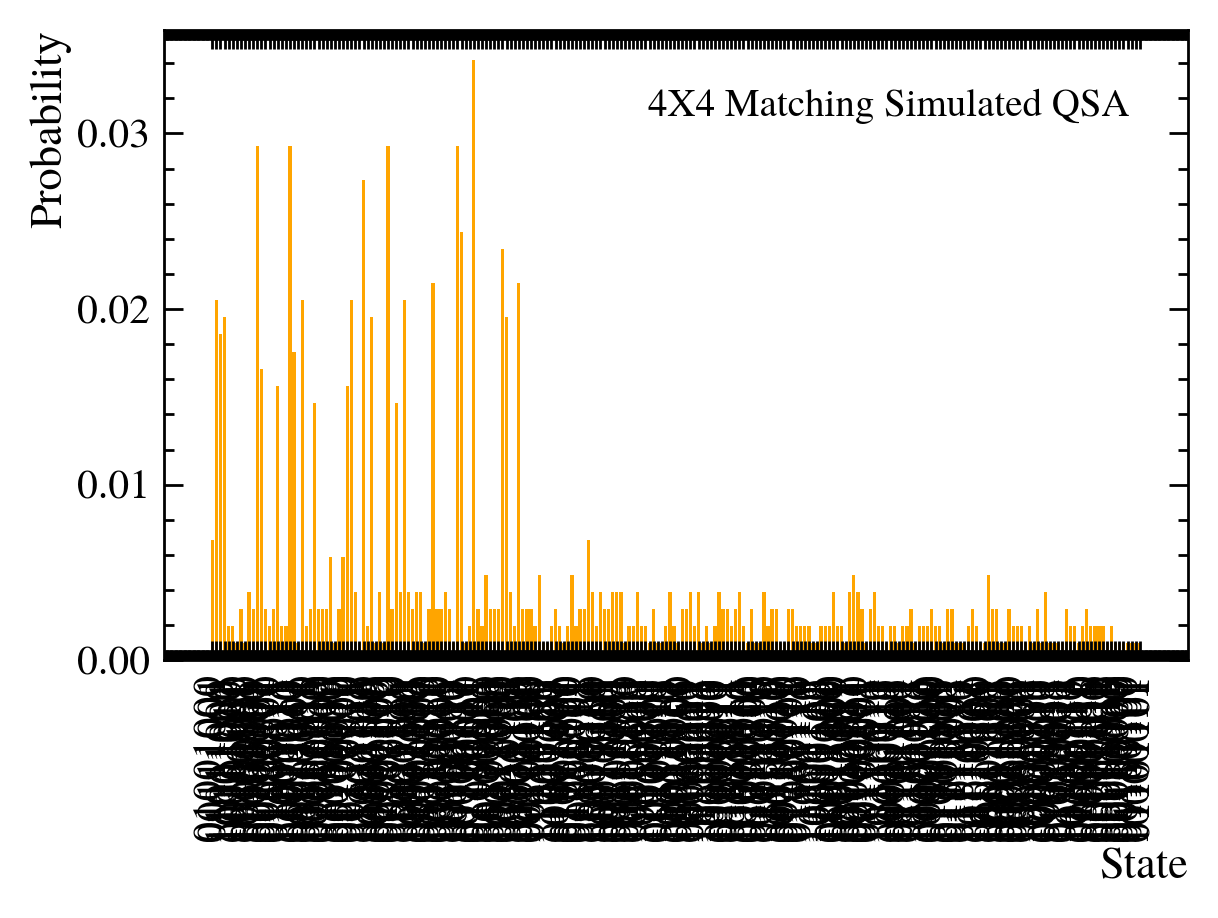

In [58]:
#이미지의 이름을 label= '(이름)'으로 사용. Latex식 수식 지원.
plt.plot([], [], ' ', label='4X4 Matching Simulated QSA')

x = np.array(list(counts.keys()))
y = np.array(list(counts.values()))
plt.bar(x, y/1024, color = 'orange')
#plt.bar(x[y > 10], y[y > 10]/1024, color = 'orange')
#plt.bar(list(counts.keys()), list(counts.values()), color = "orange")

#x,y축 이름 지정
plt.xlabel('State')
plt.ylabel('Probability')

#y축 log scale. 비활성화는 밑줄을 지우면 됨
#plt.yscale('log')

#x축 범위. y축도 동일하게 plt.ylim으로 지정가능
#plt.xlim(0,10)
plt.legend()
plt.xticks(rotation=90)
#이미지를 경로에 저장. 확장자는 .pdf, .png, .jpeg등 가능
plt.savefig('4X4MatchingSimulQSA_unfilter.pdf')
# plt.xlim(0,17)
#이미지 저장을 비활성화할시 plt.show()를 사용해야함
plt.show()